# Yomna Hussien Mohamed Abd El Hamid

## Sparks Data Science & Bussiness Analytics Task

### Task 6: Prediction using decision tree algorithm

### Importing important libraries

In [9]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score,roc_curve,roc_auc_score,f1_score,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

### Reading the data

In [2]:
iris = datasets.load_iris()
Feautres = iris.data
Goal = iris.target

df_iris = pd.DataFrame((Feautres), columns=iris.feature_names)
display(df_iris.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Some details & information about the data

In [5]:
df_iris.info()
df_iris.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


(150, 4)

In [12]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Some representation of the data

Heat Map

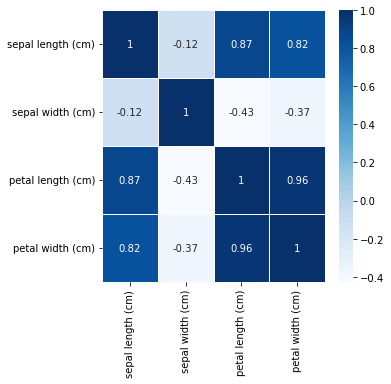

In [14]:
df_iris_corr = df_iris.corr()
fig, ax = plt.subplots(figsize=[5,5])
sn.heatmap(df_iris_corr, annot=True, linewidth=.5, ax=ax, cmap="Blues")
plt.show()

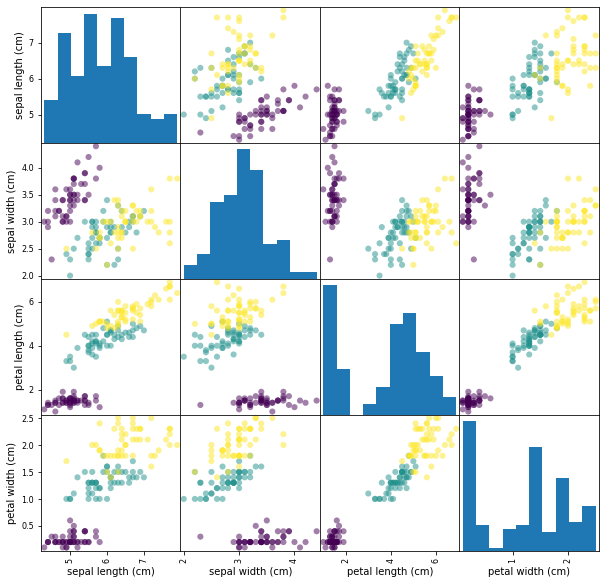

In [15]:
_ = pd.plotting.scatter_matrix(df_iris, c= Goal, figsize=[10,10], s=150)

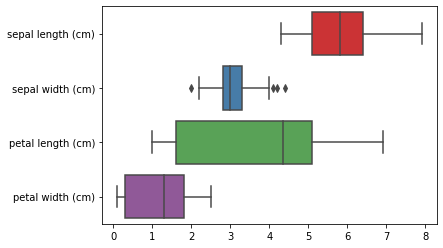

In [16]:
ax = sn.boxplot(data=df_iris, orient="h", palette="Set1")

### Dividing the data into test & train set

In [17]:
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=7)

for train_index, test_index in skf.split(Feautres, Goal):
    x_train, x_test = Feautres[train_index], Feautres[test_index]
    y_train, y_test = Goal[train_index], Goal[test_index]

In [18]:
print("x_train shape: ", x_train.shape)
print("x_testshape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (113, 4)
x_testshape:  (37, 4)
y_train shape:  (113,)
y_test shape:  (37,)


### Hyperparameter tuning using GridSearchCV

In [19]:
paramsDT = {"max_depth": [3, 4, 5, 6, 7, 8], "max_features": [0.4, 0.5, 0.6, 0.7, 0.8], "criterion": ["gini", "entropy"]}
dt = DecisionTreeClassifier(random_state = 17)
Decision_Tree = GridSearchCV(estimator = dt, param_grid = paramsDT, cv = 10, n_jobs = -1)
Decision_Tree.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=17),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': [0.4, 0.5, 0.6, 0.7, 0.8]})

In [20]:
Decision_Tree.best_score_

0.9454545454545455

In [21]:
Decision_Tree.score(x_test, y_test)

1.0

### Classification and confusion matrix report

Confusion Matrix

In [22]:
best_model_tree = Decision_Tree.best_estimator_
best_model_tree.fit(x_train, y_train)
y_pred_train = best_model_tree.predict(x_train)
y_pred_test = best_model_tree.predict(x_test)
grid = confusion_matrix(y_test, y_pred_test)
print(grid)

[[12  0  0]
 [ 0 13  0]
 [ 0  0 12]]


Classification Report

In [23]:
print(classification_report(y_test,Decision_Tree.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        12

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



### Decision Tree Visualization

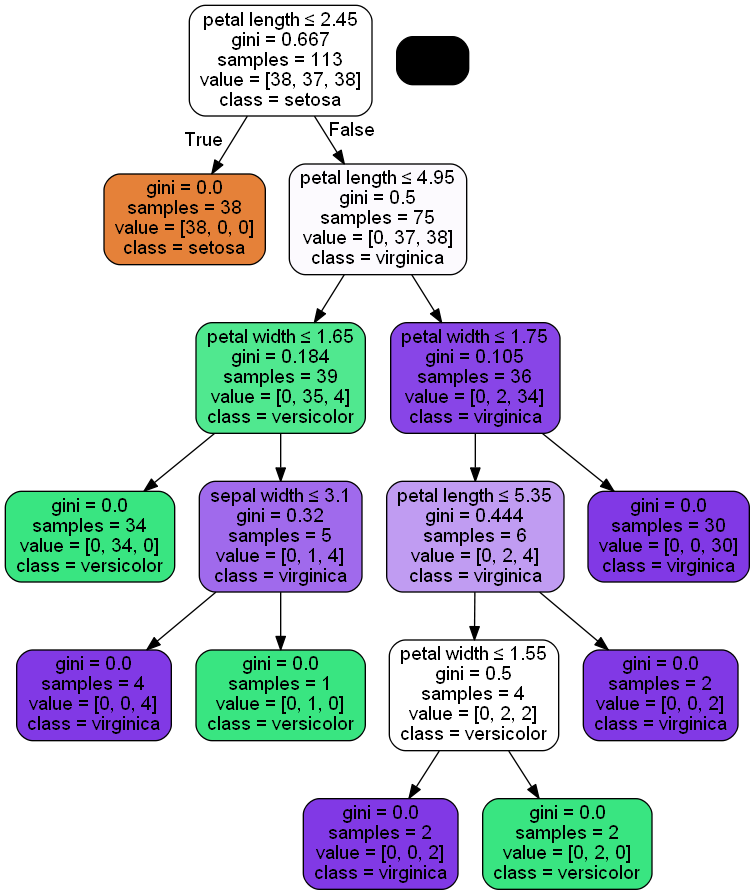

In [25]:
Feat=["sepal length","sepal width","petal length","petal width"]
classes=["setosa", "versicolor", "virginica"]

dot_data = StringIO()
export_graphviz(best_model_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = Feat, class_names=classes)
Tree_graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(Tree_graph.create_png())